In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
%matplotlib inline

In [11]:
f = h5py.File("logging/logs1.txt", 'r', libver='latest', swmr=True)
#f = h5py.File("/Users/anshulramachandran/Documents/Research/yisong/logging/logs2.txt", 'r', libver='latest', swmr=True)
move_q =  f['statistics']["ep_move_q"][:]
kick_q =  f['statistics']["ep_kick_q"][:]
turn_q = f['statistics']["ep_turn_q"][:]
tackle_q = f['statistics']["ep_tackle_q"][:]
good_q = f['statistics']["ep_good_q"][:]
bad_q = f['statistics']["ep_bad_q"][:]

r=  f['statistics']["ep_reward"][:]
closs = f['statistics']["ep_closs"][:]
aloss= f['statistics']["ep_aloss"][:]
numdone = f['statistics']["ep_numdone"][0]

In [12]:
numdone

6

In [13]:
def plot_dual(data, num, ylab, title):
    data = data[:, :num]

    d1 = data[0]
    d2 = data[1]

    plt.plot(d1, linestyle="", marker=".")
    plt.plot(d2, linestyle="", marker=".")

    plt.title(title)
    plt.xlabel("Episode")
    plt.ylabel(ylab)
    plt.show()

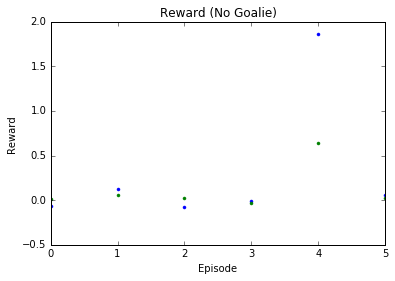

In [14]:
plot_dual(r, numdone, "Reward", "Reward (No Goalie)")

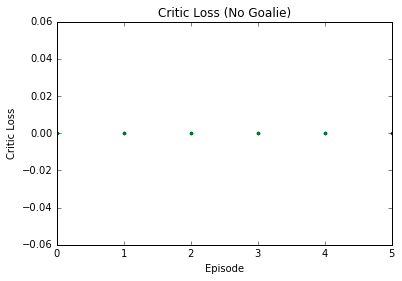

In [15]:
plot_dual(closs, numdone, "Critic Loss", "Critic Loss (No Goalie)")

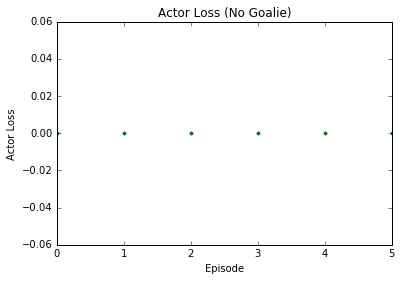

In [16]:
plot_dual(aloss, numdone, "Actor Loss", "Actor Loss (No Goalie)")

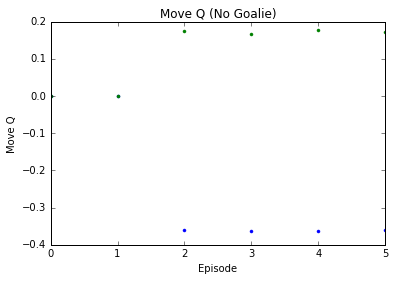

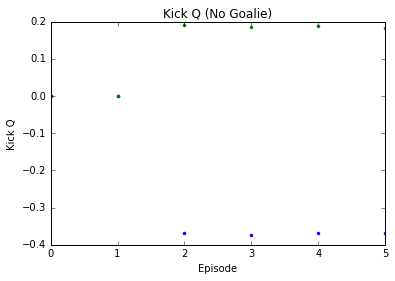

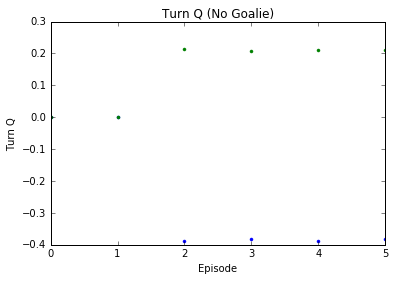

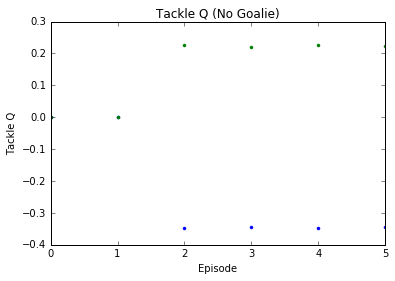

In [17]:
plot_dual(move_q, numdone, "Move Q", "Move Q (No Goalie)")
plot_dual(kick_q, numdone, "Kick Q", "Kick Q (No Goalie)")
plot_dual(turn_q, numdone, "Turn Q", "Turn Q (No Goalie)")
plot_dual(tackle_q, numdone, "Tackle Q", "Tackle Q (No Goalie)")

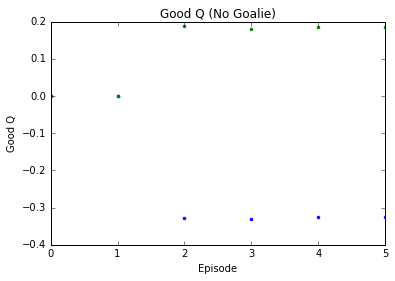

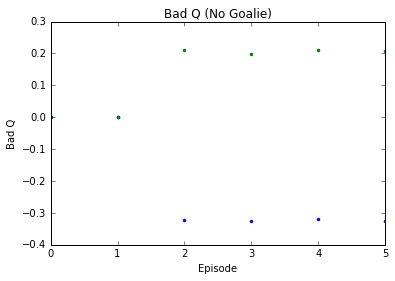

In [18]:
plot_dual(good_q, numdone, "Good Q", "Good Q (No Goalie)")
plot_dual(bad_q, numdone, "Bad Q", "Bad Q (No Goalie)")